# Human Protein Atlas - Single Cell Classification

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [5]:
train_csv = pd.read_csv('/home/chad/GitHub/Protein_Atlas/input/train.csv')

In [6]:
#Cell files can have multiple labels
train_csv.head()

,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


### Build the label map

In [7]:
label_map = {
    0: 'Nucleoplasm',
    1: 'Nuclear membrane',
    2: 'Nucleoli',
    3: 'Nucleoli fibrillar center',
    4: 'Nuclear speckles',
    5: 'Nuclear bodies',
    6: 'Endoplasmic reticulum',
    7: 'Golgi apparatus',
    8: 'Intermediate filaments',
    9: 'Actin filaments',
    10: 'Microtubules',
    11: 'Mitotic spindle',
    12: 'Centrosome',
    13: 'Plasma membrane',
    14: 'Mitochondria',
    15: 'Aggresome',
    16: 'Cytosol',
    17: 'Vesicles and punctate cytosolic patterns',
    18: 'Negative'}

### Import first four files to create the full cell image

In [10]:
path = '/home/chad/GitHub/Protein_Atlas/input/train/'

#Reads in images as numpy array
imgBlue = mpimg.imread(path+'00040581b-f1f2-4fbe-b043-b6bfea5404bb_blue.png')
imgGreen = mpimg.imread(path+'00040581b-f1f2-4fbe-b043-b6bfea5404bb_green.png')
imgRed = mpimg.imread(path+'00040581b-f1f2-4fbe-b043-b6bfea5404bb_red.png')
imgYellow = mpimg.imread(path+'00040581b-f1f2-4fbe-b043-b6bfea5404bb_yellow.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/chad/GitHub/Protein_Atlas/input/train/00040581b-f1f2-4fbe-b043-b6bfea5404bb_blue.png'

In [45]:
# creating custom color map
c1 = {'red':   ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

c2 = {'red':   ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

c3 = {'red':   ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'green': ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0))}

c4 = {'red': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

green_map = LinearSegmentedColormap('Green', c1)
red_map = LinearSegmentedColormap('Red', c2)
blue_map = LinearSegmentedColormap('Blue', c3)
yellow_map = LinearSegmentedColormap('Yellow', c4)



Text(0.5, 1.0, 'Yellow - Endoplasmic Reticulum (ER) Channels')

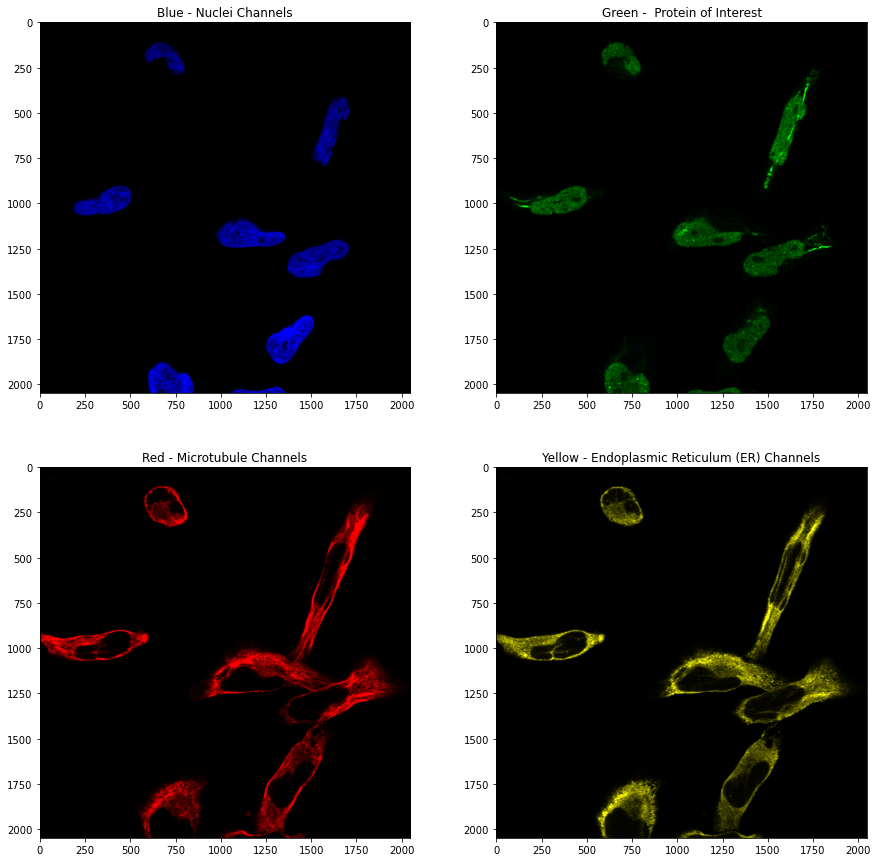

In [46]:
#Plotting the figures

fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(imgBlue, cmap=blue_map)
axs[0,0].set_title("Blue - Nuclei Channels")
axs[0,1].imshow(imgGreen, cmap=green_map)
axs[0,1].set_title("Green -  Protein of Interest")
axs[1,0].imshow(imgRed, cmap=red_map)
axs[1,0].set_title("Red - Microtubule Channels")
axs[1,1].imshow(imgYellow, cmap=yellow_map)
axs[1,1].set_title("Yellow - Endoplasmic Reticulum (ER) Channels")

### Merge images into a single cell file

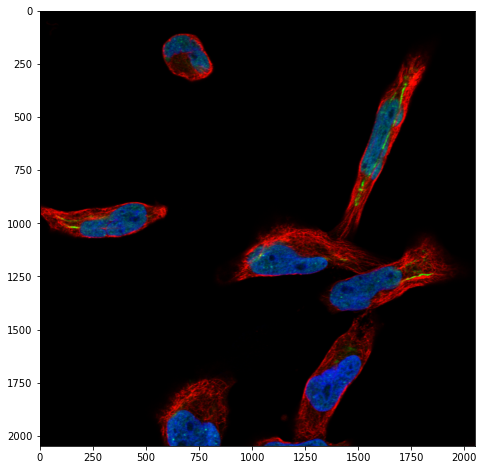

In [49]:
#Yellow is excluded
merged = np.dstack((imgRed, imgGreen, imgBlue))

f, ax = plt.subplots(1,1, figsize=(8,8))
ax.imshow(merged)